In [1]:
import numpy as np
import matplotlib.pyplot as plt
import SimpleITK as sitk
import os

import pydicom

from registration_utilities import *

%matplotlib autob

Using matplotlib backend: Qt5Agg


In [50]:
DATADIR = '/home/andrea/Trento/DATI/1af1b29e-a57d-4e5f-a71e-d08294f0a043/OPBG0010_20180622_094303725/'
files  = os.listdir(DATADIR)
sequence = []
variant = []
for FILE in files:
    RefDs = pydicom.dcmread(os.path.join(DATADIR, FILE))
    sequence.append(RefDs.SequenceName)
    variant.append(RefDs.SequenceVariant)


In [51]:
np.c_[sequence, variant]

array([['se1', 'OSP'],
       ['tse1-11', 'OSP'],
       ['tir1m11', 'OSP'],
       ['se1', 'OSP'],
       ['se1', 'OSP'],
       ['tir1m11', 'OSP'],
       ['se1', 'OSP'],
       ['se1', 'OSP'],
       ['se1', 'OSP'],
       ['se1', 'OSP'],
       ['se1', 'OSP'],
       ['tse1-11', 'OSP'],
       ['se1', 'OSP'],
       ['tse1-11', 'OSP'],
       ['se1', 'OSP'],
       ['tir1m11', 'OSP'],
       ['se1', 'OSP'],
       ['se1', 'OSP'],
       ['tse1-11', 'OSP'],
       ['tse1-11', 'OSP'],
       ['se1', 'OSP'],
       ['se1', 'OSP'],
       ['tse1-11', 'OSP'],
       ['tir1m11', 'OSP'],
       ['tir1m11', 'OSP'],
       ['se1', 'OSP'],
       ['se1', 'OSP'],
       ['se1', 'OSP'],
       ['se1', 'OSP'],
       ['tse1-11', 'OSP'],
       ['tse1-11', 'OSP'],
       ['tse1-11', 'OSP'],
       ['se1', 'OSP'],
       ['se1', 'OSP'],
       ['se1', 'OSP'],
       ['se1', 'OSP'],
       ['se1', 'OSP'],
       ['se1', 'OSP'],
       ['tse1-11', 'OSP'],
       ['tir1m11', 'OSP'],
       ['se1', '

In [52]:
dir(RefDs)

['AccessionNumber',
 'AcquisitionDate',
 'AcquisitionMatrix',
 'AcquisitionNumber',
 'AcquisitionTime',
 'AcquisitionsInSeries',
 'AngioFlag',
 'BitsAllocated',
 'BitsStored',
 'BodyPartExamined',
 'Columns',
 'ConfidentialityCode',
 'ContentDate',
 'ContentTime',
 'ContrastBolusAgent',
 'DateOfLastCalibration',
 'DeviceSerialNumber',
 'EchoNumbers',
 'EchoTime',
 'EchoTrainLength',
 'FlipAngle',
 'FrameOfReferenceUID',
 'HighBit',
 'ImageDimensions',
 'ImageFormat',
 'ImageGeometryType',
 'ImageLocation',
 'ImageOrientation',
 'ImageOrientationPatient',
 'ImagePosition',
 'ImagePositionPatient',
 'ImageType',
 'ImagedNucleus',
 'ImagingFrequency',
 'InPlanePhaseEncodingDirection',
 'InstanceNumber',
 'Location',
 'MRAcquisitionType',
 'MagneticFieldStrength',
 'Manufacturer',
 'ManufacturerModelName',
 'MaskingImage',
 'ModalitiesInStudy',
 'Modality',
 'NumberOfAverages',
 'NumberOfStudyRelatedInstances',
 'PatientBirthDate',
 'PatientID',
 'PatientName',
 'PatientPosition',
 'Patien

In [34]:
DATADIR_1 = '/home/andrea/Trento/DATI/1af1b29e-a57d-4e5f-a71e-d08294f0a043/test/pa000/st000/se000/'
DATADIR_2 = '/home/andrea/Trento/DATI/1af1b29e-a57d-4e5f-a71e-d08294f0a043/test/pa000/st000/se001/'

reader_1 = sitk.ImageSeriesReader()
reader_1.SetOutputPixelType(sitk.sitkFloat32)
dicom_names_1 = reader_1.GetGDCMSeriesFileNames(DATADIR_1)
reader_1.SetFileNames(dicom_names_1)

reader_2 = sitk.ImageSeriesReader()
reader_2.SetOutputPixelType(sitk.sitkFloat32)
dicom_names_2 = reader_2.GetGDCMSeriesFileNames(DATADIR_2)
reader_2.SetFileNames(dicom_names_2)

In [35]:
fixed_image = reader_1.Execute()
#, sitk.sitkFloat32)
moving_image = reader_2.Execute()#, sitk.sitkFloat32) 

In [36]:
moving_to_fixed = sitk.Resample(moving_image, fixed_image)
moving_to_fixed_np = sitk.GetArrayFromImage(moving_to_fixed)
moving_image_np = sitk.GetArrayFromImage(moving_image)
fixed_image_np = sitk.GetArrayFromImage(fixed_image)

In [19]:
moving_to_fixed_np.shape, moving_image_np.shape

((20, 256, 256), (26, 512, 512))

In [42]:
plt.imshow(moving_to_fixed_np[10,:,:])

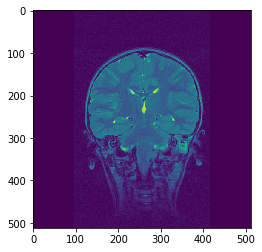

In [38]:
plt.imshow(moving_image_np[10,:,:])


In [43]:
moving_to_fixed_np.shape

(20, 256, 256)

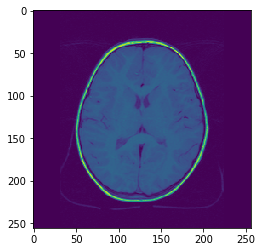

In [37]:
plt.imshow(fixed_image_np[10,:,:])

In [41]:
moving_image_np.shape

(26, 512, 512)

In [44]:
initial_transform = sitk.CenteredTransformInitializer(fixed_image, 
                                                      moving_to_fixed, 
                                                      sitk.Euler3DTransform(), 
                                                      sitk.CenteredTransformInitializerFilter.GEOMETRY)

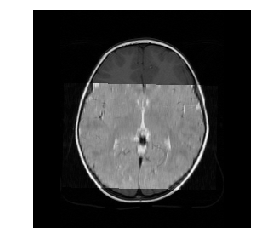

In [45]:
display_registration_results(fixed_image, moving_to_fixed, initial_transform)

In [16]:
print(initial_transform)

itk::simple::Transform
 Euler3DTransform (0x55d0e4a934e0)
   RTTI typeinfo:   itk::Euler3DTransform<double>
   Reference Count: 1
   Modified Time: 5051
   Debug: Off
   Object Name: 
   Observers: 
     none
   Matrix: 
     1 0 0 
     0 1 0 
     0 0 1 
   Offset: [0, 0, 0]
   Center: [-0.74276, -1.32754, -0.174873]
   Translation: [0, 0, 0]
   Inverse: 
     1 0 0 
     0 1 0 
     0 0 1 
   Singular: 0
   Euler's angles: AngleX=0 AngleY=0 AngleZ=0
   m_ComputeZYX = 0



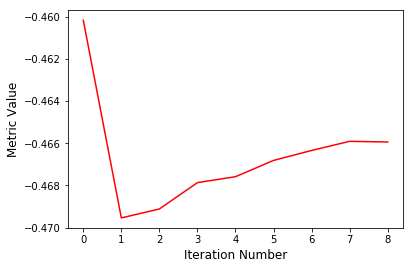

In [46]:
registration_method = sitk.ImageRegistrationMethod()

registration_method.SetMetricAsMattesMutualInformation(numberOfHistogramBins=50)
registration_method.SetMetricSamplingStrategy(registration_method.RANDOM)
registration_method.SetMetricSamplingPercentage(0.01)

registration_method.SetInterpolator(sitk.sitkLinear)

registration_method.SetOptimizerAsGradientDescent(learningRate=1.0, numberOfIterations=60)
registration_method.SetOptimizerScalesFromPhysicalShift() 

registration_method.SetInitialTransform(initial_transform, inPlace=False)

registration_method.AddCommand(sitk.sitkStartEvent, metric_start_plot)
registration_method.AddCommand(sitk.sitkEndEvent, metric_end_plot)
registration_method.AddCommand(sitk.sitkIterationEvent, 
                               lambda: metric_plot_values(registration_method))

final_transform_v1 = registration_method.Execute(fixed_image, moving_to_fixed)

In [ ]:
print(final_transform_v1)

In [48]:
%matplotlib auto

Using matplotlib backend: Qt5Agg


In [49]:
display_registration_results(fixed_image, moving_to_fixed, final_transform_v1)

interactive(children=(IntSlider(value=9, description='image_z', max=19), FloatSlider(value=0.5, description='aâ€¦